In [195]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import glob
from keras import models
import os
import seaborn as sns
from keras.utils import to_categorical
%matplotlib inline

#imG = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob("imagenes/mascota/Gato100/*.jpg")]


En primer lugar se hace una rutina para que se lean las imagenes dentro de una variable **training_data** que contenga las imágenes con su respectiva etiqueta

In [362]:

img_size = 50
datadir = "imagenes/mascota/"
categories = ["Perro100","Gato100"]
training_data=[]
labels = []
for category in categories:
    path =os.path.join(datadir,category)
    class_num = categories.index(category)
    for i in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_data.append(new_array)
        labels.append(class_num)




Se define entonces los datos de entrenamiento y los datos test

In [361]:
np.shape(training_data)

(202, 50, 50)

In [363]:
x = np.arange(len(training_data))
ind = (x[np.random.choice(x,size=int(0.8*len(training_data)),replace=False)])
ind_rev = np.delete(x,ind)

X_train=[];Y_train =[]
X_test = []; Y_test = []
for i in ind:
    X_train.append(training_data[i])
    Y_train.append(labels[i])
for i in ind_rev:
    X_test.append(training_data[i])
    Y_test.append(labels[i])



In [327]:
#[X_train,Y_train] = training_data[:int(0.8*len(training_data))],labels[:int(0.8*len(labels))]
#[X_test,Y_test] = training_data[int(0.8*len(training_data)):len(training_data)],labels[int(0.8*len(labels)):len(labels)]

In [364]:
X_train = np.array(X_train).reshape(len(X_train),img_size,img_size,1)/np.max(X_train)
Y_train = np.array(Y_train)/np.max(Y_train)
X_test = np.array(X_test).reshape(len(X_test),img_size,img_size,1)/np.max(X_test)
Y_test = np.array(Y_test)/np.max(Y_test)

In [365]:
np.shape(X_train)


(161, 50, 50, 1)

hay 161 datos de entrenamiento y 41 datos de testeo
Este es el numero de ocurrencia de cada animal


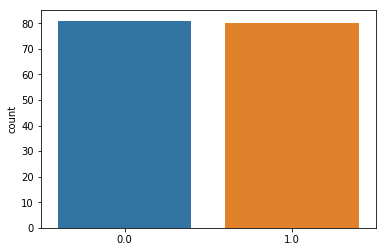

In [366]:
X_train = np.array(X_train)/np.max(X_train)

X_test = np.array(X_test)/np.max(X_test)


print("hay", X_train.shape[0],"datos de entrenamiento y",X_test.shape[0],"datos de testeo")
print("Este es el numero de ocurrencia de cada animal")
sns.countplot(Y_train)


Veamos las primeras 64 imagenes que vamos a utilizar

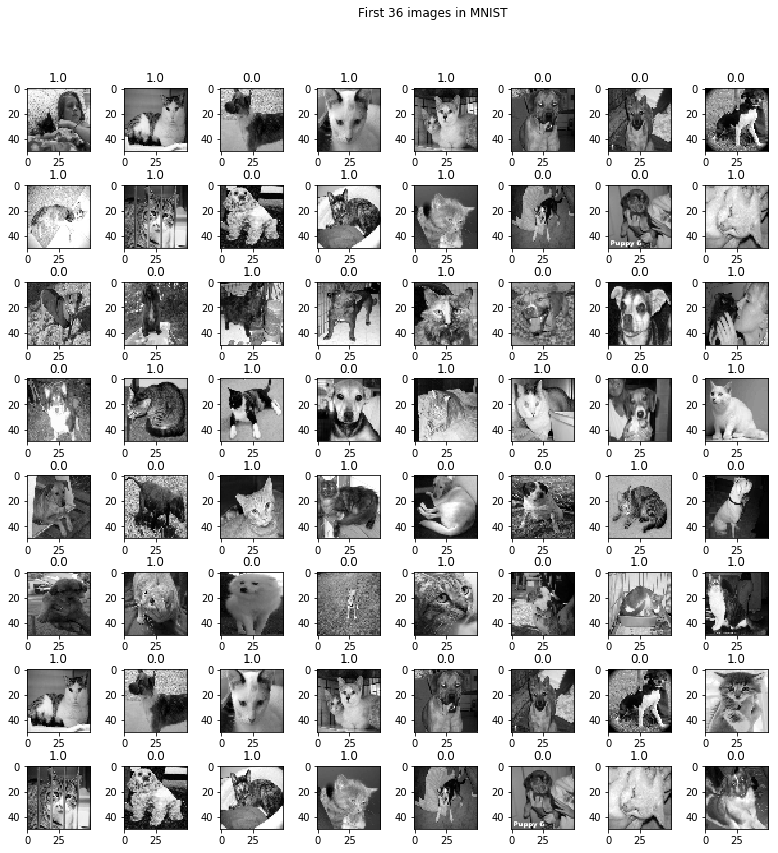

In [367]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(8) for j in range(8)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((img_size, img_size)), cmap = 'gray')
    ax[x, y].set_title(Y_train[x + y * 6])

In [368]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [369]:
print(Y_train)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [370]:
np.shape(X_train)

(161, 50, 50, 1)

In [371]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

size = (img_size,img_size,1)
n_classes = 2

model = Sequential()
model.add(Conv2D(16,(5,5),input_shape = size,kernel_initializer = "normal"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (5, 5), kernel_initializer = 'normal'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])


In [372]:
print(np.shape(Y_train))

(161, 2)


In [373]:
model.fit(X_train, Y_train, batch_size = 256, epochs = 4, 
        validation_split = 0.2, verbose = 1)

Train on 128 samples, validate on 33 samples
Epoch 1/4
128/128 [==============================] - 2s 15ms/step - loss: 0.6921 - acc: 0.5156 - val_loss: 1.1541 - val_acc: 0.5152
Epoch 2/4
128/128 [==============================] - 1s 4ms/step - loss: 1.2251 - acc: 0.5000 - val_loss: 0.7728 - val_acc: 0.4848
Epoch 3/4
128/128 [==============================] - 1s 4ms/step - loss: 0.7774 - acc: 0.5000 - val_loss: 0.6947 - val_acc: 0.4848
Epoch 4/4
128/128 [==============================] - 0s 4ms/step - loss: 0.6884 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.5152


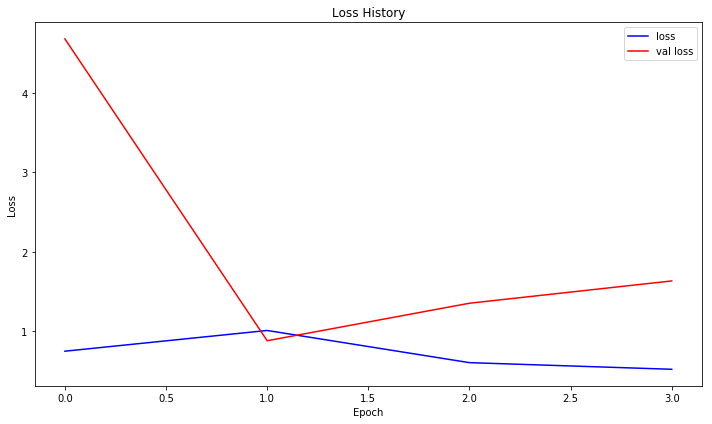

In [374]:

hist = history.history
loss = hist['loss']
val_loss = hist['val_loss']
epochs = np.arange(4)
fig, axis1 = plt.subplots(figsize=(10,6))
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss History")
plt.legend(loc='upper right')
plt.tight_layout()

In [375]:
score, acc = model.evaluate(X_test, Y_test, verbose = 1)
print(score)
print(acc)

41/41 [==============================] - 0s 2ms/step
0.6955980309625951
0.4878048780487805


In [213]:
print(Y_test)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [376]:
Y_pred = model.predict(X_test)
Y_pred

array([[0.5287676 , 0.47123238],
       [0.55819064, 0.44180942],
       [0.55141854, 0.4485815 ],
       [0.5537726 , 0.4462273 ],
       [0.5227396 , 0.47726035],
       [0.5351314 , 0.4648686 ],
       [0.5694073 , 0.43059278],
       [0.55824536, 0.44175458],
       [0.5418616 , 0.45813844],
       [0.5465592 , 0.45344082],
       [0.5528071 , 0.44719288],
       [0.55527425, 0.44472572],
       [0.5465843 , 0.45341563],
       [0.5379578 , 0.46204227],
       [0.54949695, 0.4505031 ],
       [0.5492984 , 0.45070156],
       [0.5582627 , 0.44173726],
       [0.556136  , 0.44386402],
       [0.5639343 , 0.43606564],
       [0.56830114, 0.43169886],
       [0.52942437, 0.47057563],
       [0.534325  , 0.4656749 ],
       [0.53262377, 0.46737617],
       [0.54406387, 0.4559362 ],
       [0.5352713 , 0.46472874],
       [0.5574328 , 0.44256723],
       [0.54493654, 0.45506346],
       [0.5560202 , 0.4439798 ],
       [0.5511316 , 0.44886836],
       [0.57305676, 0.4269432 ],
       [0.

In [384]:
np.shape(X_test[0].reshape(img_size,img_size))

(50, 50)

In [248]:
Y_pred = model.predict(X_test)
Y_pred_real = []
Y_test_real = []
Y_prob = []
for i in range(len(Y_pred)):
    Y_pred_real.append(np.argmax(Y_pred[i], axis=None, out=None))
    Y_test_real.append(np.argmax(Y_test[i], axis=None, out=None))
    Y_prob.append(np.max(Y_pred[i]))
print(Y_pred_real)
print(Y_test_real)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [216]:
from keras import backend as K
K.set_learning_phase(1)
import tensorflow as tf


layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print('Layer dict', layer_dict)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 46, 46, 16)        416       
_________________________________________________________________
activation_29 (Activation)   (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 19, 19, 64)        25664     
_________________________________________________________________
activation_30 (Activation)   (None, 19, 19, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 9, 64)          0         
__________

In [170]:
np.shape(X_test)

(41, 50, 50, 1)

In [295]:
len(Y_train)

161